In [1]:
from utils import img_util
from utils import hed_util
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Grab path to current working directory
CWD_PATH = os.getcwd()
TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')

 
    

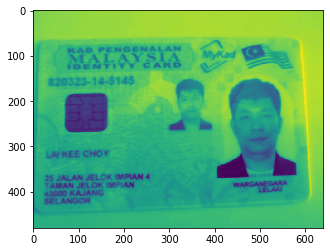

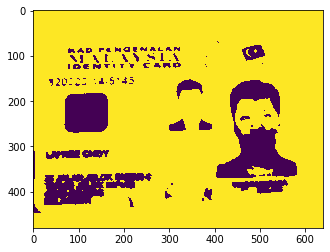

initial max area  0
number of contour  1
number of contour v  1


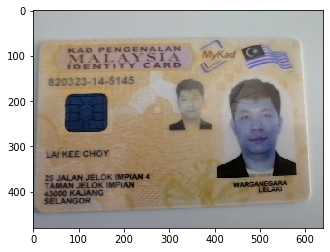

In [15]:
#img = cv2.imread(PATH_TO_IMAGE, cv2.COLOR_BGR2RGB)
PATH_TO_IMAGE = os.path.join(TEST_IMAGE_PATH, 'ocr/mxw15pdres0xcayu5x3z7clufgekg3e9rck9zmuq2d_front.jpeg')
PATH_TO_IMAGE_OUT = os.path.join(TEST_IMAGE_PATH, 'output.jpg')
img = cv2.imread(PATH_TO_IMAGE, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#gray = cv2.GaussianBlur(gray,(51,51),3)
gray = cv2.bilateralFilter(gray, 5, 90,90)
plt.imshow(gray)
plt.show()
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
plt.imshow(binary)
plt.show()
cnts = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
boxes = []
cnt = None
max_area = x = y = w = h = 0
i=0
v=0
print('initial max area ', max_area)
for c in cnts:
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)
    v+=1
    if area > max_area:
        #print('{} > {}'.format(area, max_area))
        #cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        #cv2.drawContours(img, [c], 0, (0,  255, 0), 3)
        cropped = img[y:y + h, x:x + w] 
        max_area = area
        cnt = c    
        boxes.append(c)
        i+=1

plt.imshow(cropped)
#cv2.imwrite(PATH_TO_IMAGE_OUT,cropped)
print('number of contour ',i)
print('number of contour v ',v)


In [ ]:

boxes = np.asarray(boxes)
box = boxes[len(boxes)-1]
#box = boxes[9]
x1,y1,w1,h1 = cv2.boundingRect(box)
print('x1 {} y1 {} w1 {} h1 {} x+w {} y+h {}'.format(x1,y1,w1,h1,x+w,y+h))

#cv2.drawContours(img, [box], 0, (0,  255, 0), 3)
#cv2.rectangle(img, (x1,y1), (x1+w1, y1+h1), (255, 0, 0), 3)
#cv2.drawContours(img, [cnt], 0, (0,  255, 0), 3)
#cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 3)
#cv2.rectangle(img, (left,top), (right,bottom), (255, 0, 0), 2)
print('x {} y {} w {} h {}'.format(x1,y1,w1,h1))
crop_img = img[y1:y1+h1, x1:x1+w1]
plt.imshow(crop_img)